In [1]:
import pandas as pd

In [2]:
df_feature_x = pd.read_csv("job.csv", index_col=0)
df_feature_x.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
5,<35,No,Master,1,Man,No,Dev,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [3]:
df_feature_x["EdLevel"].replace({"NoHigherEd": 2, "Other": 1, "Undergraduate": 3, "Master": 4, "PhD": 5}, inplace=True)
df_feature_x.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,4,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,3,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,4,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,3,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,5,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
5,<35,No,4,1,Man,No,Dev,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,>35,No,4,1,Man,No,Dev,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,<35,No,4,1,Man,No,NotDev,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,>35,No,3,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,>35,No,4,1,Man,No,Dev,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [4]:
#df_feature_x["Age"].replace({"<35": 0, ">35": 1}, inplace=True)
one_hot_age = pd.get_dummies(df_feature_x["Age"], prefix="Age")
one_hot_access = pd.get_dummies(df_feature_x["Accessibility"], prefix="Accessibility")
one_hot_gender = pd.get_dummies(df_feature_x["Gender"], prefix="Gender")
one_hot_mainBranch = pd.get_dummies(df_feature_x["MainBranch"], prefix="MainBranch")
one_hot_mental = pd.get_dummies(df_feature_x["MentalHealth"], prefix="MentalHealth")
df_feature_x = pd.concat([one_hot_age, one_hot_access, one_hot_gender, one_hot_mainBranch, one_hot_mental, df_feature_x], axis=1)
df_feature_x.drop(columns=["Age", "Accessibility", "Gender", "MainBranch", "MentalHealth"], inplace=True)
df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,Gender_Man,Gender_NonBinary,Gender_Woman,MainBranch_Dev,MainBranch_NotDev,MentalHealth_No,MentalHealth_Yes,EdLevel,Employment,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,True,False,True,False,True,False,False,True,False,True,False,4,1,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,True,False,True,False,True,False,False,True,False,True,False,3,1,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,True,False,True,False,True,False,False,True,False,True,False,4,1,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,True,False,True,False,True,False,False,True,False,True,False,3,1,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,False,True,True,False,True,False,False,False,True,True,False,5,0,40,30,Singapore,160932.0,C++;Python,2,0
5,True,False,True,False,True,False,False,True,False,True,False,4,1,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,False,True,True,False,True,False,False,True,False,True,False,4,1,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,True,False,True,False,True,False,False,False,True,True,False,4,1,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,False,True,True,False,True,False,False,True,False,True,False,3,1,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,False,True,True,False,True,False,False,True,False,True,False,4,1,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [5]:
#df_feature_x["Gender"].replace({"Man": 1, "Woman": 2, "NonBinary": 3}, inplace=True)
df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,Gender_Man,Gender_NonBinary,Gender_Woman,MainBranch_Dev,MainBranch_NotDev,MentalHealth_No,MentalHealth_Yes,EdLevel,Employment,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,True,False,True,False,True,False,False,True,False,True,False,4,1,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,True,False,True,False,True,False,False,True,False,True,False,3,1,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,True,False,True,False,True,False,False,True,False,True,False,4,1,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,True,False,True,False,True,False,False,True,False,True,False,3,1,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,False,True,True,False,True,False,False,False,True,True,False,5,0,40,30,Singapore,160932.0,C++;Python,2,0
5,True,False,True,False,True,False,False,True,False,True,False,4,1,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,False,True,True,False,True,False,False,True,False,True,False,4,1,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,True,False,True,False,True,False,False,False,True,True,False,4,1,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,False,True,True,False,True,False,False,True,False,True,False,3,1,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,False,True,True,False,True,False,False,True,False,True,False,4,1,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [6]:
#df_feature_x["Accessibility"].replace({"Yes": 1, "No": 0}, inplace=True)
df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,Gender_Man,Gender_NonBinary,Gender_Woman,MainBranch_Dev,MainBranch_NotDev,MentalHealth_No,MentalHealth_Yes,EdLevel,Employment,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,True,False,True,False,True,False,False,True,False,True,False,4,1,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,True,False,True,False,True,False,False,True,False,True,False,3,1,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,True,False,True,False,True,False,False,True,False,True,False,4,1,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,True,False,True,False,True,False,False,True,False,True,False,3,1,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,False,True,True,False,True,False,False,False,True,True,False,5,0,40,30,Singapore,160932.0,C++;Python,2,0
5,True,False,True,False,True,False,False,True,False,True,False,4,1,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,False,True,True,False,True,False,False,True,False,True,False,4,1,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,True,False,True,False,True,False,False,False,True,True,False,4,1,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,False,True,True,False,True,False,False,True,False,True,False,3,1,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,False,True,True,False,True,False,False,True,False,True,False,4,1,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [7]:
#df_feature_x["MentalHealth"].replace({"Yes": 1, "No": 0}, inplace=True)
df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,Gender_Man,Gender_NonBinary,Gender_Woman,MainBranch_Dev,MainBranch_NotDev,MentalHealth_No,MentalHealth_Yes,EdLevel,Employment,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,True,False,True,False,True,False,False,True,False,True,False,4,1,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,True,False,True,False,True,False,False,True,False,True,False,3,1,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,True,False,True,False,True,False,False,True,False,True,False,4,1,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,True,False,True,False,True,False,False,True,False,True,False,3,1,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,False,True,True,False,True,False,False,False,True,True,False,5,0,40,30,Singapore,160932.0,C++;Python,2,0
5,True,False,True,False,True,False,False,True,False,True,False,4,1,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,False,True,True,False,True,False,False,True,False,True,False,4,1,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,True,False,True,False,True,False,False,False,True,True,False,4,1,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,False,True,True,False,True,False,False,True,False,True,False,3,1,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,False,True,True,False,True,False,False,True,False,True,False,4,1,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [8]:
#df_feature_x["MainBranch"].replace({"Dev": 1, "NotDev": 2}, inplace=True)
df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,Gender_Man,Gender_NonBinary,Gender_Woman,MainBranch_Dev,MainBranch_NotDev,MentalHealth_No,MentalHealth_Yes,EdLevel,Employment,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,True,False,True,False,True,False,False,True,False,True,False,4,1,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,True,False,True,False,True,False,False,True,False,True,False,3,1,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,True,False,True,False,True,False,False,True,False,True,False,4,1,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,True,False,True,False,True,False,False,True,False,True,False,3,1,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,False,True,True,False,True,False,False,False,True,True,False,5,0,40,30,Singapore,160932.0,C++;Python,2,0
5,True,False,True,False,True,False,False,True,False,True,False,4,1,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,False,True,True,False,True,False,False,True,False,True,False,4,1,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,True,False,True,False,True,False,False,False,True,True,False,4,1,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,False,True,True,False,True,False,False,True,False,True,False,3,1,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,False,True,True,False,True,False,False,True,False,True,False,4,1,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

years_exp = df_feature_x["YearsCode"].values.reshape(-1, 1)
years_pro_exp = df_feature_x["YearsCodePro"].values.reshape(-1, 1)
num_skills = df_feature_x["ComputerSkills"].values.reshape(-1, 1)
prev_salary = df_feature_x["PreviousSalary"].values.reshape(-1, 1)

data_to_normal = np.column_stack((years_exp, years_pro_exp, num_skills, prev_salary))

new_values = scaler.fit_transform(data_to_normal)

df_feature_x["YearsCode"] = new_values[:, 0]
df_feature_x["YearsCodePro"] = new_values[:, 1]
df_feature_x["ComputerSkills"] = new_values[:, 2]
df_feature_x["PreviousSalary"] = new_values[:, 3]

df_feature_x.head()

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,Gender_Man,Gender_NonBinary,Gender_Woman,MainBranch_Dev,MainBranch_NotDev,MentalHealth_No,MentalHealth_Yes,EdLevel,Employment,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,True,False,True,False,True,False,False,True,False,True,False,4,1,-0.767551,-0.640488,Sweden,-0.327318,C++;Python;Git;PostgreSQL,-1.335861,0
1,True,False,True,False,True,False,False,True,False,True,False,3,1,-0.235925,-0.514862,Spain,-0.429768,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,-0.202361,1
2,True,False,True,False,True,False,False,True,False,True,False,4,1,0.083050,-0.389236,Germany,0.192769,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,-0.910798,0
3,True,False,True,False,True,False,False,True,False,True,False,3,1,-0.554901,-0.389236,Canada,-0.436780,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,-0.060674,0
4,False,True,True,False,True,False,False,False,True,True,False,5,0,2.741180,2.625783,Singapore,1.882923,C++;Python,-1.619236,0


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

years_exp = df_feature_x["YearsCode"].values.reshape(-1, 1)
years_pro_exp = df_feature_x["YearsCodePro"].values.reshape(-1, 1)
num_skills = df_feature_x["ComputerSkills"].values.reshape(-1, 1)
prev_salary = df_feature_x["PreviousSalary"].values.reshape(-1, 1)

data_to_minmax = np.column_stack((years_exp, years_pro_exp, num_skills, prev_salary))

new_values = scaler.fit_transform(data_to_normal)

df_feature_x["YearsCode"] = new_values[:, 0]
df_feature_x["YearsCodePro"] = new_values[:, 1]
df_feature_x["ComputerSkills"] = new_values[:, 2]
df_feature_x["PreviousSalary"] = new_values[:, 3]

df_feature_x.head()

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,Gender_Man,Gender_NonBinary,Gender_Woman,MainBranch_Dev,MainBranch_NotDev,MentalHealth_No,MentalHealth_Yes,EdLevel,Employment,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,True,False,True,False,True,False,False,True,False,True,False,4,1,0.14,0.08,Sweden,0.230139,C++;Python;Git;PostgreSQL,0.037383,0
1,True,False,True,False,True,False,False,True,False,True,False,3,1,0.24,0.10,Spain,0.207505,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,0.112150,1
2,True,False,True,False,True,False,False,True,False,True,False,4,1,0.30,0.12,Germany,0.345042,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,0.065421,0
3,True,False,True,False,True,False,False,True,False,True,False,3,1,0.18,0.12,Canada,0.205956,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,0.121495,0
4,False,True,True,False,True,False,False,False,True,True,False,5,0,0.80,0.60,Singapore,0.718445,C++;Python,0.018692,0


In [11]:
have_worked_with = pd.DataFrame(df_feature_x["HaveWorkedWith"])
have_worked_with.head()

,HaveWorkedWith
0,C++;Python;Git;PostgreSQL
1,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...
2,C;C++;Java;Perl;Ruby;Git;Ruby on Rails
3,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...
4,C++;Python


In [12]:
unique_value = []
for i in range(len(have_worked_with)):
    data = have_worked_with.iloc[i].values
    inside = str(data[0])
    split_data = inside.split(";")
    for dt in split_data:
        if dt not in unique_value:
            unique_value.append(dt)
print(unique_value)

['C++', 'Python', 'Git', 'PostgreSQL', 'Bash/Shell', 'HTML/CSS', 'JavaScript', 'Node.js', 'SQL', 'TypeScript', 'Express', 'React.js', 'Vue.js', 'AWS', 'C', 'Java', 'Perl', 'Ruby', 'Ruby on Rails', 'PHP', 'jQuery', 'Laravel', 'MySQL', 'Docker', 'Kotlin', 'Kubernetes', 'Angular', 'Spring', 'Heroku', 'DynamoDB', 'Delphi', 'Go', 'Scala', 'Terraform', 'Google Cloud Platform', 'Microsoft Azure', 'MongoDB', 'Assembly', 'C#', 'Matlab', 'Unity 3D', 'Rust', 'PowerShell', 'ASP.NET Core ', 'Microsoft SQL Server', 'Redis', 'VBA', 'ASP.NET', 'Svelte', 'DigitalOcean', 'Couchbase', 'MariaDB', 'SQLite', 'Ansible', 'Yarn', 'Oracle', 'Django', 'FastAPI', 'Gatsby', 'Dart', 'Objective-C', 'Swift', 'Angular.js', 'Flask', 'Firebase', 'R', 'Elasticsearch', 'Julia', 'Clojure', 'Puppet', 'Xamarin', 'Symfony', 'Chef', 'F#', 'Unreal Engine', 'IBM DB2', 'Groovy', 'Cassandra', 'IBM Cloud or Watson', 'Haskell', 'Drupal', 'LISP', 'Elixir', 'APL', 'Erlang', 'Pulumi', 'Deno', 'Crystal', 'Oracle Cloud Infrastructure', '

In [29]:
import tensorflow as tf
array_feature = np.array(unique_value)
print(len(array_feature))
filters_ = '!"$%&()*,:;<=>?@[\\]^_`{|}~\t\n'
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=len(array_feature) + 1, split=",", filters=filters_)
tokenizer.fit_on_texts(array_feature)
word_index = tokenizer.word_index
print(word_index)
print(len(word_index))

117
{'matlab': 1, 'c++': 2, 'python': 3, 'git': 4, 'postgresql': 5, 'bash/shell': 6, 'html/css': 7, 'javascript': 8, 'node.js': 9, 'sql': 10, 'typescript': 11, 'express': 12, 'react.js': 13, 'vue.js': 14, 'aws': 15, 'c': 16, 'java': 17, 'perl': 18, 'ruby': 19, 'ruby on rails': 20, 'php': 21, 'jquery': 22, 'laravel': 23, 'mysql': 24, 'docker': 25, 'kotlin': 26, 'kubernetes': 27, 'angular': 28, 'spring': 29, 'heroku': 30, 'dynamodb': 31, 'delphi': 32, 'go': 33, 'scala': 34, 'terraform': 35, 'google cloud platform': 36, 'microsoft azure': 37, 'mongodb': 38, 'assembly': 39, 'c#': 40, 'unity 3d': 41, 'rust': 42, 'powershell': 43, 'asp.net core ': 44, 'microsoft sql server': 45, 'redis': 46, 'vba': 47, 'asp.net': 48, 'svelte': 49, 'digitalocean': 50, 'couchbase': 51, 'mariadb': 52, 'sqlite': 53, 'ansible': 54, 'yarn': 55, 'oracle': 56, 'django': 57, 'fastapi': 58, 'gatsby': 59, 'dart': 60, 'objective-c': 61, 'swift': 62, 'angular.js': 63, 'flask': 64, 'firebase': 65, 'r': 66, 'elasticsearch'

In [33]:
not_in_dict = [skill.lower() for skill in unique_value if skill.lower() not in word_index.keys()]
print(not_in_dict)

[]


In [17]:
col_to_use = ["Age_<35", "Age_>35", "Accessibility_No", "Accessibility_Yes", "Gender_Man", "Gender_NonBinary", "Gender_Woman","MainBranch_Dev", "MainBranch_NotDev", "MentalHealth_No", "MentalHealth_Yes", "EdLevel", "Employment", "YearsCode", "YearsCodePro", "PreviousSalary", "ComputerSkills"]
new_df_x = df_feature_x[col_to_use]
new_df_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,Gender_Man,Gender_NonBinary,Gender_Woman,MainBranch_Dev,MainBranch_NotDev,MentalHealth_No,MentalHealth_Yes,EdLevel,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills
0,1,0,1,0,1,0,0,1,0,1,0,4,1,0.14,0.08,0.230139,0.037383
1,1,0,1,0,1,0,0,1,0,1,0,3,1,0.24,0.10,0.207505,0.112150
2,1,0,1,0,1,0,0,1,0,1,0,4,1,0.30,0.12,0.345042,0.065421
3,1,0,1,0,1,0,0,1,0,1,0,3,1,0.18,0.12,0.205956,0.121495
4,0,1,1,0,1,0,0,0,1,1,0,5,0,0.80,0.60,0.718445,0.018692
5,1,0,1,0,1,0,0,1,0,1,0,4,1,0.18,0.04,0.173724,0.046729
6,0,1,1,0,1,0,0,1,0,1,0,4,1,0.52,0.36,0.347457,0.158879
7,1,0,1,0,1,0,0,0,1,1,0,4,1,0.28,0.10,0.363028,0.037383
8,0,1,1,0,1,0,0,1,0,1,0,3,1,0.78,0.42,0.305832,0.028037
9,0,1,1,0,1,0,0,1,0,1,0,4,1,0.40,0.32,0.168532,0.056075


In [18]:
new_df_y = df_feature_x["Employed"]
new_df_y.head(10)

0    0
1    1
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: Employed, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(new_df_x, new_df_y, test_size=0.2, random_state=1)


print(f"Data before splitting: {len(df_feature_x)}")
print(f"Train data: {len(X_train)}")
print(f"Validation data: {len(X_valid)}")

Data before splitting: 73462
Train data: 58769
Validation data: 14693


In [20]:
EPOCH = 15
LEARNING_RATE = 1e-3

In [21]:
import tensorflow as tf
len_feature = len(new_df_x.columns)

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len_feature,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=EPOCH, validation_data=(X_valid, Y_valid))

2023-11-23 05:25:15.278373: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 05:25:15.278440: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 05:25:15.279632: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 05:25:15.387196: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 05:25:19.482255: I tensorflow/compiler/

Epoch 1/15


2023-11-23 05:25:21.184218: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3ea2097a90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-23 05:25:21.184274: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-23 05:25:21.191601: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-23 05:25:21.218090: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-23 05:25:21.300198: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1837/1837 [==============================] - 12s 6ms/step - loss: 0.5865 - accuracy: 0.6822 - val_loss: 0.4621 - val_accuracy: 0.7798
Epoch 2/15
1837/1837 [==============================] - 11s 6ms/step - loss: 0.4527 - accuracy: 0.7817 - val_loss: 0.4506 - val_accuracy: 0.7834
Epoch 3/15
1837/1837 [==============================] - 11s 6ms/step - loss: 0.4485 - accuracy: 0.7829 - val_loss: 0.4566 - val_accuracy: 0.7718
Epoch 4/15
1837/1837 [==============================] - 11s 6ms/step - loss: 0.4487 - accuracy: 0.7820 - val_loss: 0.4498 - val_accuracy: 0.7826
Epoch 5/15
1837/1837 [==============================] - 11s 6ms/step - loss: 0.4475 - accuracy: 0.7825 - val_loss: 0.4493 - val_accuracy: 0.7846
Epoch 6/15
1837/1837 [==============================] - 11s 6ms/step - loss: 0.4468 - accuracy: 0.7816 - val_loss: 0.4502 - val_accuracy: 0.7862
Epoch 7/15
1837/1837 [==============================] - 12s 6ms/step - loss: 0.4456 - accuracy: 0.7834 - val_loss: 0.4454 - val_accuracy: 0.7

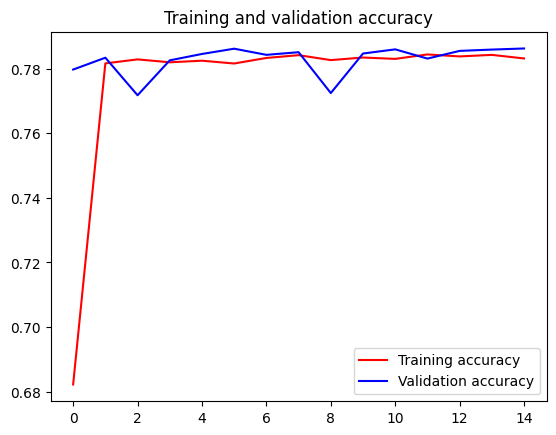

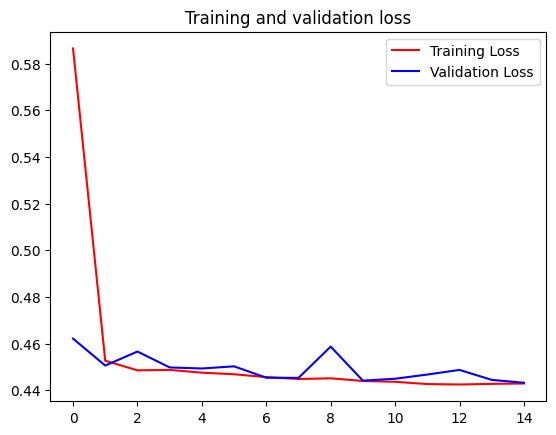

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
model.predict([[1,0,1,0,1,0,0,1,0,1,0,4,1,0.14,0.08,0.230139,0.037383]])

1/1 [==============================] - 0s 71ms/step


array([[0.02384069]], dtype=float32)